# **Predicting House prices by Linear Regression**

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset

from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [9]:
# convert housing data into datframe

df=pd.DataFrame(housing.data,columns=housing.feature_names)
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [10]:
# also add the target variable to the df

df['Target_Price']=housing.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target_Price  
0    -122.23         4.526  
1    -122.22         3.585  
2    -122.24         3.521  
3    -122.25         3.413  
4    -122.25         3.422

In [11]:
df.shape

(20640, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedInc        20640 non-null  float64
 1   HouseAge      20640 non-null  float64
 2   AveRooms      20640 non-null  float64
 3   AveBedrms     20640 non-null  float64
 4   Population    20640 non-null  float64
 5   AveOccup      20640 non-null  float64
 6   Latitude      20640 non-null  float64
 7   Longitude     20640 non-null  float64
 8   Target_Price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  Target_Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [14]:
# check for null values

df.isnull().sum() # no null values

MedInc          0
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
Target_Price    0
dtype: int64

In [15]:
# now lets do the EDA - Understand the Data Structure, Identify Patterns and Trends, Detect Outliers and Missing Values, Inform Model Selection

# correlation - feature selection technique (we can ignore highly correlated features)

df.corr()

# let's keep the threshold to be 0.8 (absolute)
# greater than this --> eliminate one of the 2 features

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc        1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge     -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms      0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms    -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population    0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup      0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude     -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude    -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Target_Price  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

              Latitude  Longitude  Target_Price  
MedInc       -0.079809  -0.015176      0.688075  
HouseAge      0.011173  -0.108197      0.105623  
AveRooms      0.106389  -0.027540      0.151948  
AveBedrms     0.069721   0.013344     -0.046701  
Population   -0.108785   0.099773     -0.024650  
AveOccup      0.002366   0.002476     -0.023737  
Latitude      1.000000  -0.924664     -0.144160  
Longitude    -0.924664   1.000000     -0.045967  
Target_Price -0.144160  -0.045967      1.000000

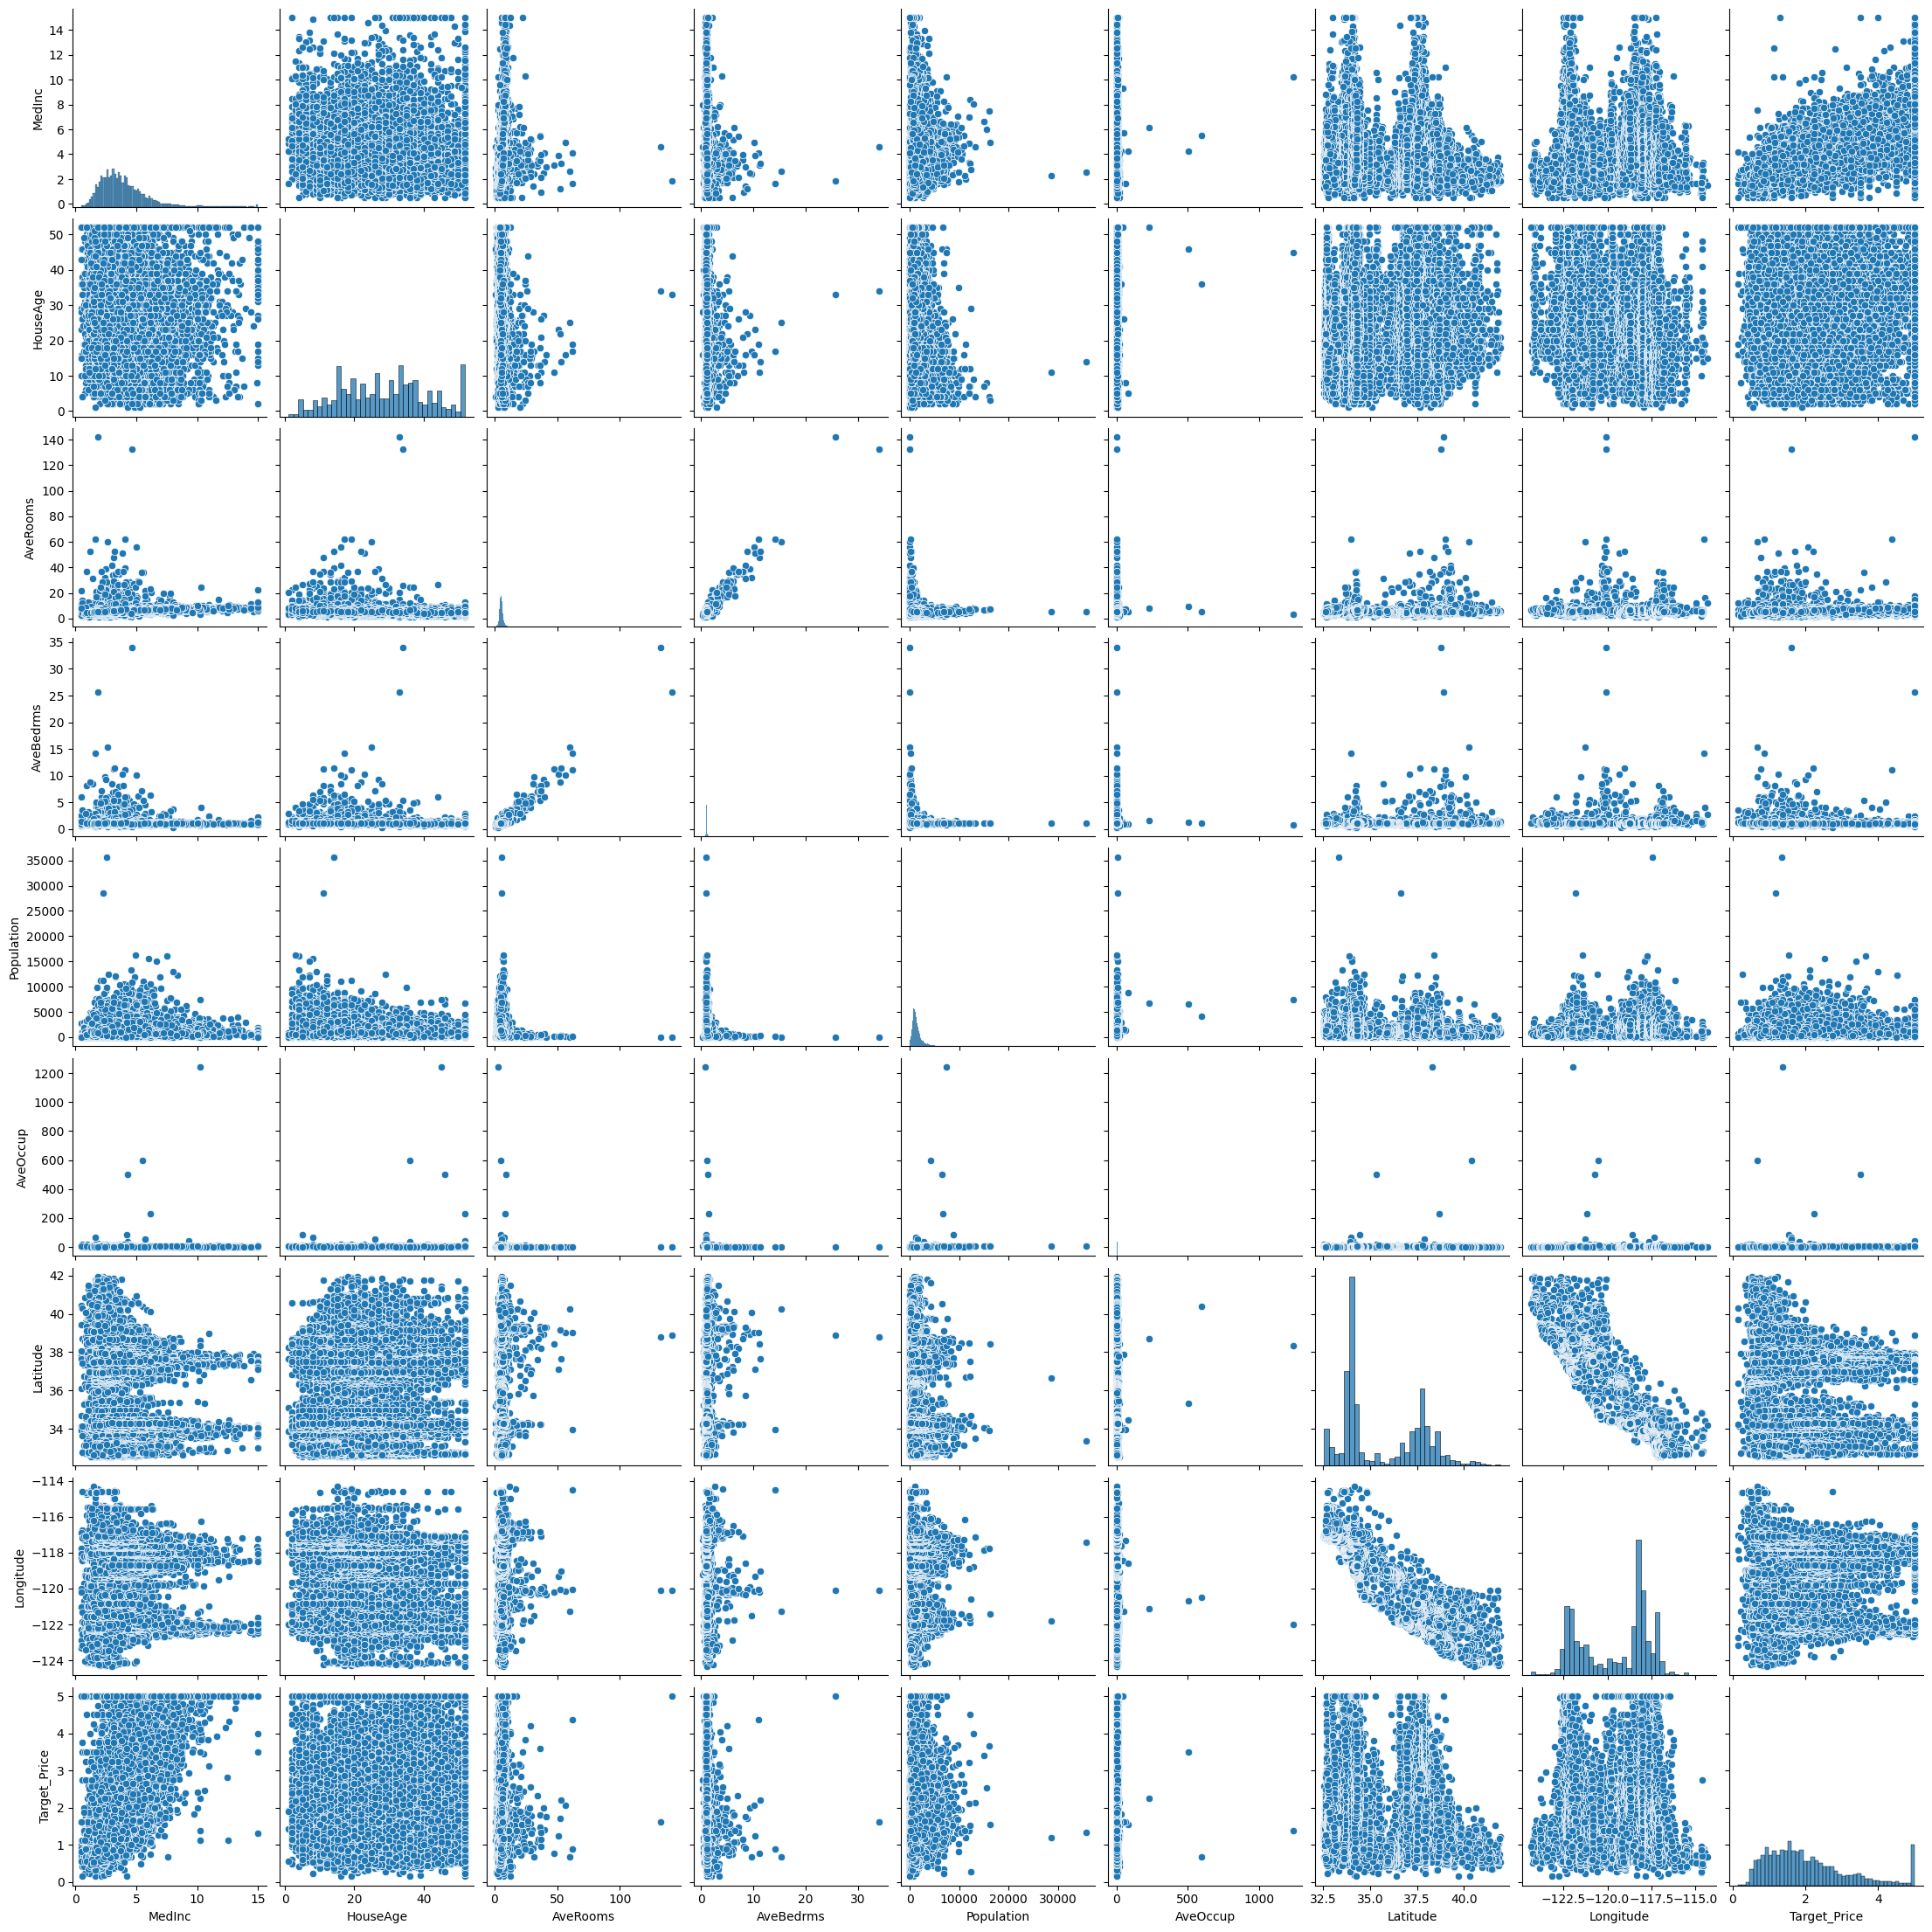

In [16]:
# Lets understand the plots of each feature with other feature

sns.pairplot(df)

<Axes: >

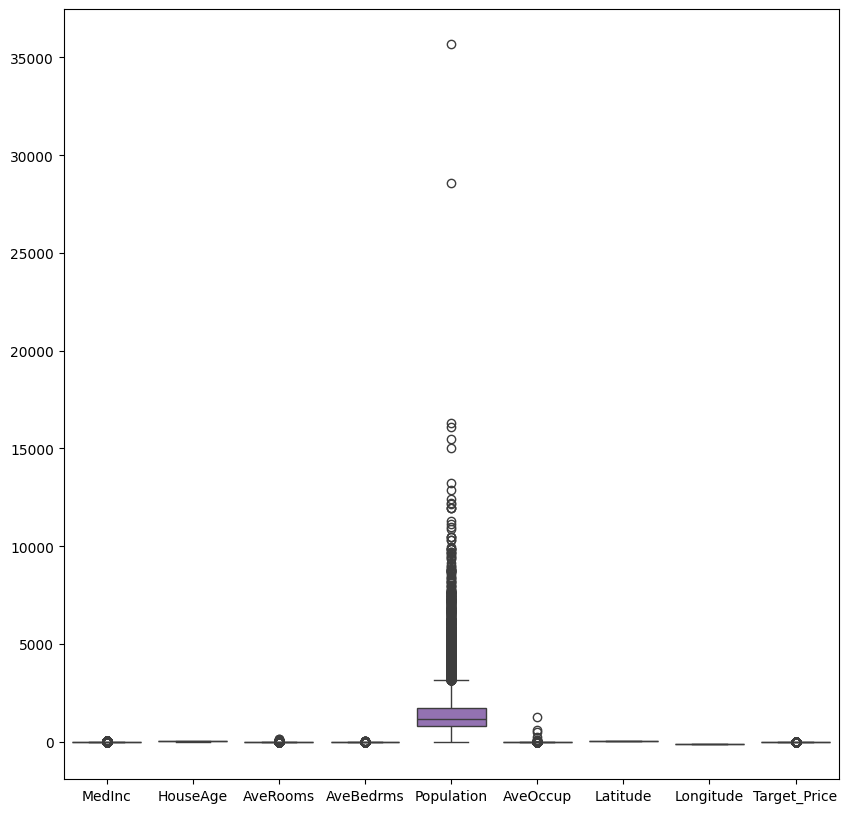

In [17]:
# boxplot o detect the outliers
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=df,ax=ax)

# creates box plot for all features which is not good because the range of data and weight/scale  of data are  different
# it is suggested to see boxplots for individual features

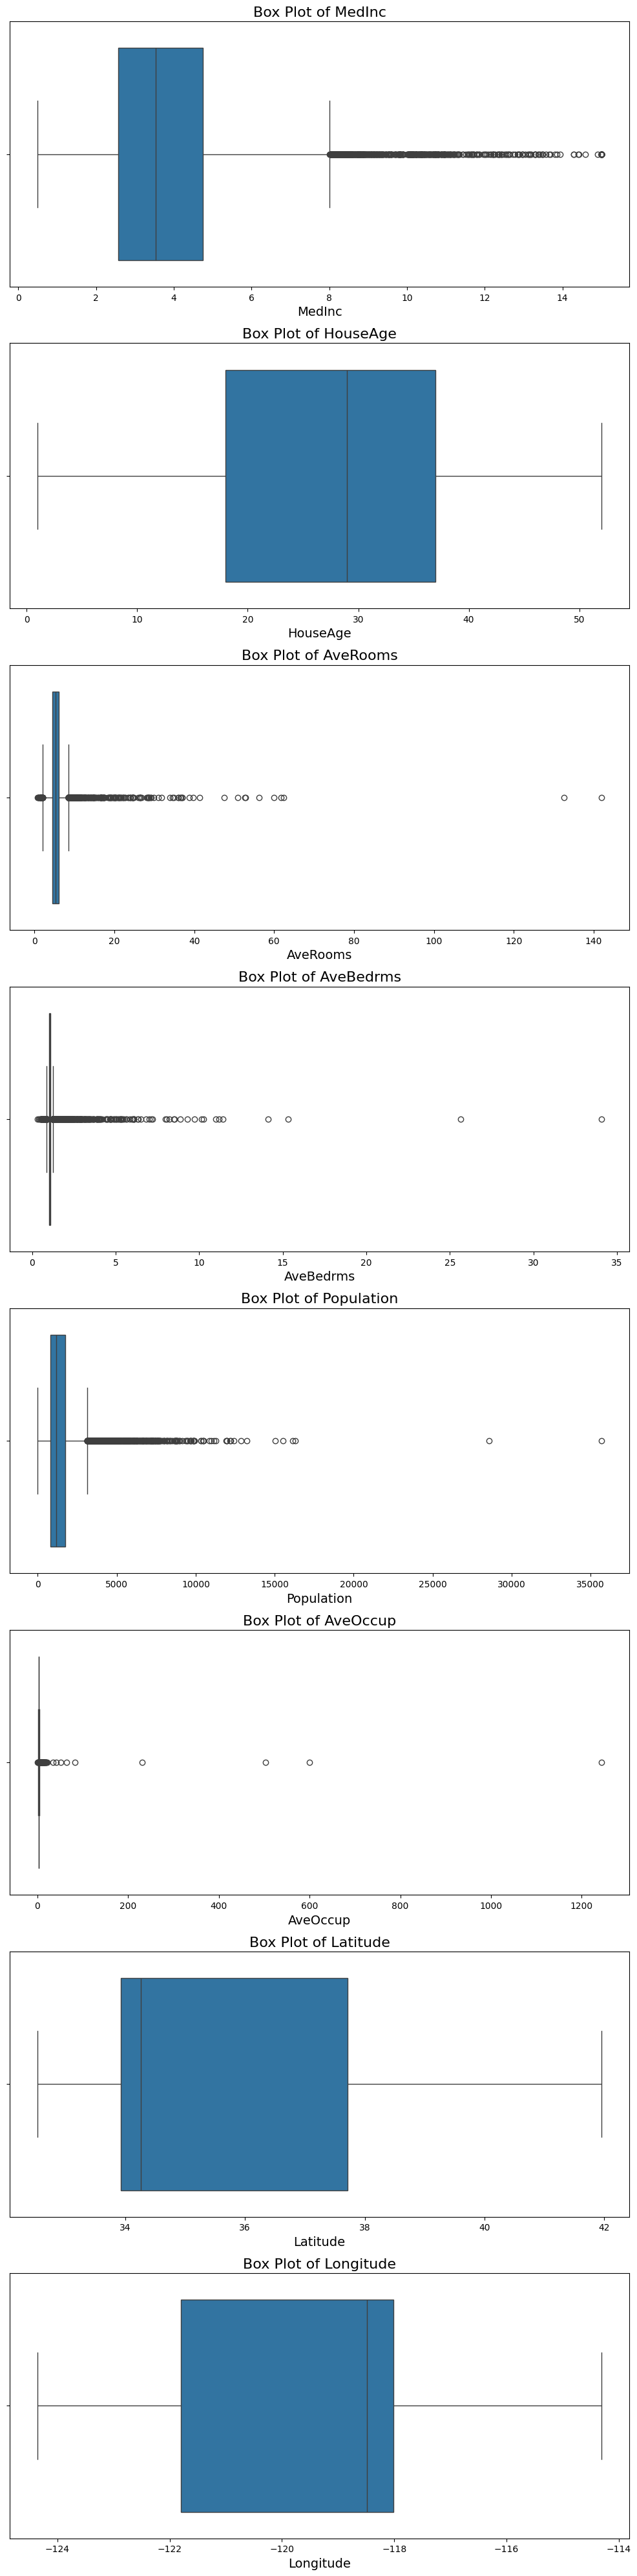

In [18]:
# create box plot individual features

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Get the list of feature names
features = df.columns[:-1]  # Exclude the target variable if present

# Set up the plotting grid
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# Create a box plot for each feature
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}', fontsize=16)
    axes[i].set_xlabel(feature, fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: >

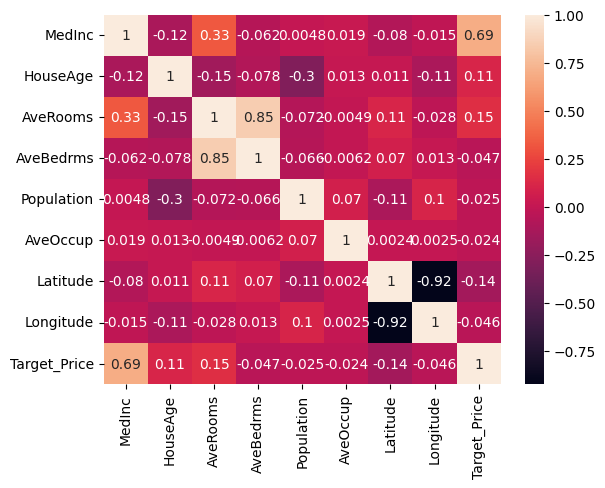

In [19]:
# let's plot the heatmap for better visualization

sns.heatmap(df.corr(),annot=True)


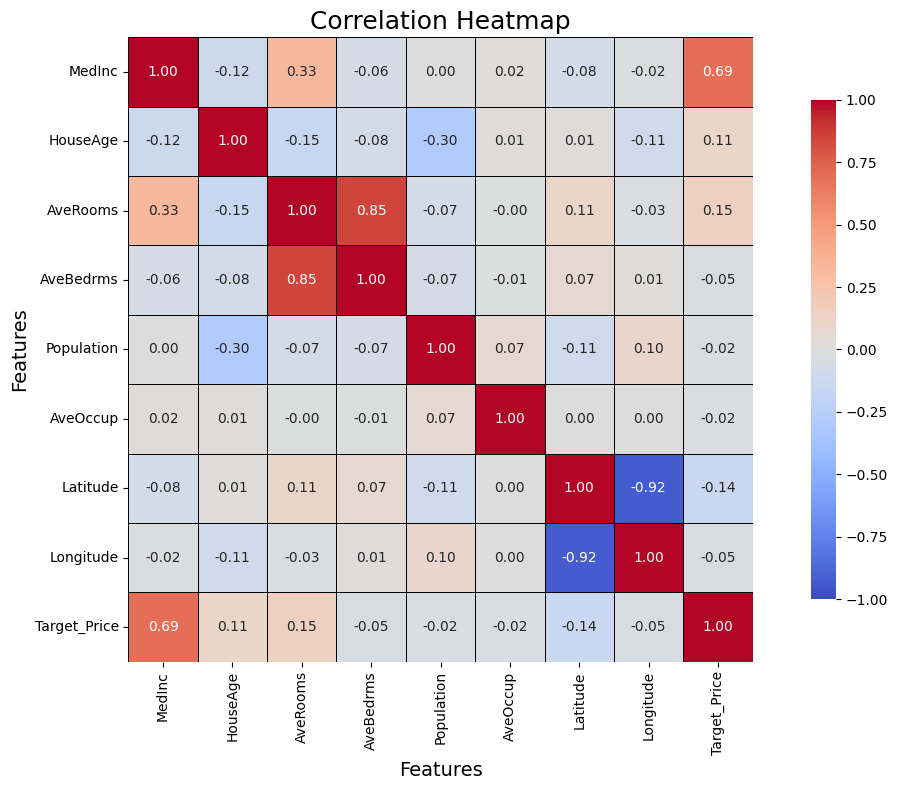

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    df.corr(),
    annot=True,                 # Show correlation coefficients
    fmt=".2f",                  # Format the annotation text to 2 decimal places
    cmap="coolwarm",            # Color palette
    square=True,                # Make cells square-shaped
    cbar_kws={"shrink": .8},   # Adjust color bar size
    linewidths=.5,             # Add lines between cells for better separation
    linecolor='black',          # Color of the lines
    vmin=-1,                    # Set min value for color scale
    vmax=1                       # Set max value for color scale
)

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.tight_layout()            # Adjust layout to make room for labels
plt.show()


# here the pairs which have correlation greater than 0.8 are
# +ve -->  (AveRooms, AveBedrms)
# -ve -->  (Longitude, Latitude)


In [21]:
# remove the redundant column (one from each pair)
df.drop(['AveRooms','Longitude'],axis=1,inplace=True)

In [22]:
df

MedInc  HouseAge  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0   1.081081       565.0  2.181467     37.85   
...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0   1.162264      1387.0  2.616981     39.37   

       Target_Price  
0             4.526  
1             3.585  
2             3.521  
3             3.413  
4             3.422  
...             ...  
20635         0.781  
20636         0.771  
20637         0.923  
20638         0.847  
20639         0.894  

[20640 rows x 7 columns]

In [23]:
# let's split the data into independet and dependent features

x=df.iloc[:,:-1] # indepenent
y=df.iloc[:,-1] # dependent

In [24]:
x.head()

MedInc  HouseAge  AveBedrms  Population  AveOccup  Latitude
0  8.3252      41.0   1.023810       322.0  2.555556     37.88
1  8.3014      21.0   0.971880      2401.0  2.109842     37.86
2  7.2574      52.0   1.073446       496.0  2.802260     37.85
3  5.6431      52.0   1.073059       558.0  2.547945     37.85
4  3.8462      52.0   1.081081       565.0  2.181467     37.85

In [25]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target_Price, dtype: float64

In [26]:
# split the data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # 30% testing and 70% training. # to fix trainig and testing data--> use random_state.


In [27]:
display(x_train.head(),x_test.head(),y_train.head(),y_test.head())

MedInc  HouseAge  AveBedrms  Population  AveOccup  Latitude
14196  3.2596      33.0   1.006421      2300.0  3.691814     32.71
8267   3.8125      49.0   1.041005      1314.0  1.738095     33.77
17445  4.1563       4.0   0.985119       915.0  2.723214     34.66
14265  1.9425      36.0   1.033803      1418.0  3.994366     32.69
2271   3.5542      43.0   1.134211       874.0  2.300000     36.78

MedInc  HouseAge  AveBedrms  Population  AveOccup  Latitude
20046  1.6812      25.0   1.022284      1392.0  3.877437     36.06
3024   2.5313      30.0   1.193493      1565.0  2.679795     35.14
15663  3.4801      52.0   1.185877      1310.0  1.360332     37.80
20484  5.7376      17.0   1.020202      1705.0  3.444444     34.28
9814   3.7250      34.0   1.028037      1063.0  2.483645     36.62

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: Target_Price, dtype: float64

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: Target_Price, dtype: float64

In [28]:
# here, Different features are in different units and scales. we need to normalize them to a fixed scale to avoid bias.

# why normalization is important ?
#1.  features with larger scales can dominate the distance calculations, leading to biased results. Normalizing ensures that no single feature disproportionately influences the model.
#2.  normalization can lead to faster convergence
#3.  it becomes easier to compare the importance and contribution of different features to the model, especially in cases where you are analyzing coefficients in linear models.

# there are 2 methods to normalize the data --> Min-Max Scaling and standard scaling (z-score normalization)


# let's use the Z-score Normalization (Standardization):
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# here, we are using
# train set -> use fit_transform()
# test set -> use transform()
# WHY ??
# fit means compute mean and variance
# transform is to find z score for each data point

# transform  applies the transformation using the parameters calculated from the training data without recalculating them
# The model does not have access to test data characteristics during training, preventing data leakage.
# The test set is scaled based on the training set's parameters, allowing for a fair evaluation of the model's performance on unseen data.
# If you were to use fit_transform() on the test set, the scaler would be fitted to the test data, which could contain information about the data distribution that the model has not seen before. This leads to data leakage, where the model gains access to information about the test set during training, resulting in overly optimistic performance metrics
# By fitting the scaler only on the training data, you ensure that the test set is transformed in a way that is consistent with how the model was trained. This consistency is crucial for evaluating model performance accurately.

In [29]:
x_train

array([[-0.326196  ,  0.34849025, -0.20836543,  0.76827628,  0.05137609,
        -1.3728112 ],
       [-0.03584338,  1.61811813, -0.12853018, -0.09890135, -0.11736222,
        -0.87669601],
       [ 0.14470145, -1.95271028, -0.25753771, -0.44981806, -0.03227969,
        -0.46014647],
       ...,
       [-0.49697313,  0.58654547, -0.03921583,  0.28983345,  0.02030568,
        -0.75500738],
       [ 0.96545045, -1.07984112, -0.06626528,  0.30830275,  0.00707608,
         0.90651045],
       [-0.68544764,  1.85617335, -0.08750798,  1.04883375, -0.08535429,
         0.99543676]])

<Axes: >

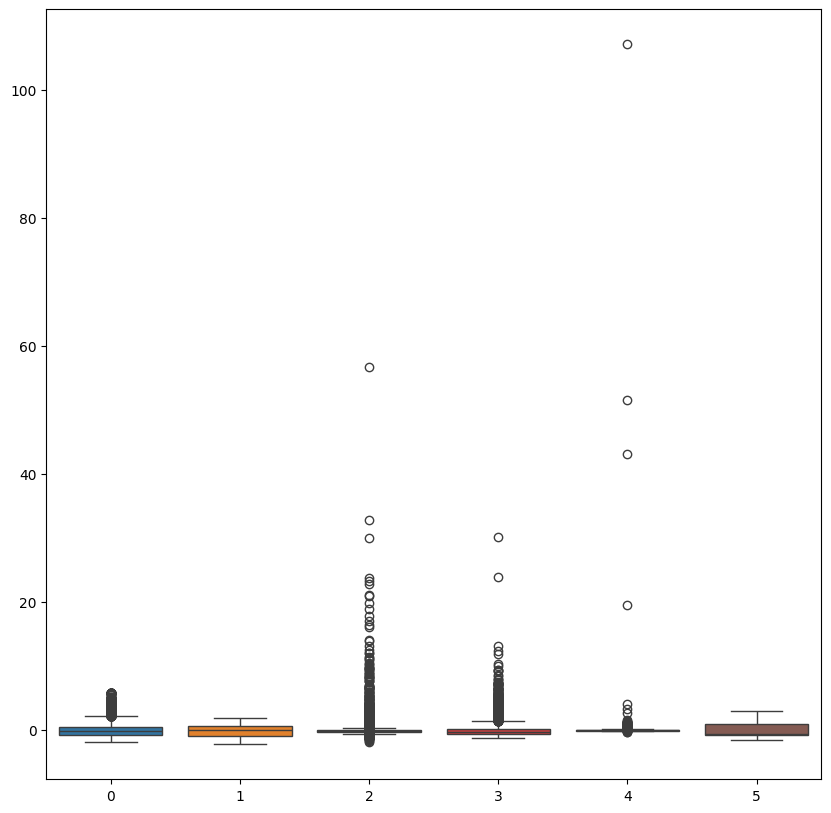

In [30]:
# let's plot box plot for better understanding

fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_train,ax=ax) # all are in same scale and level

<Axes: >

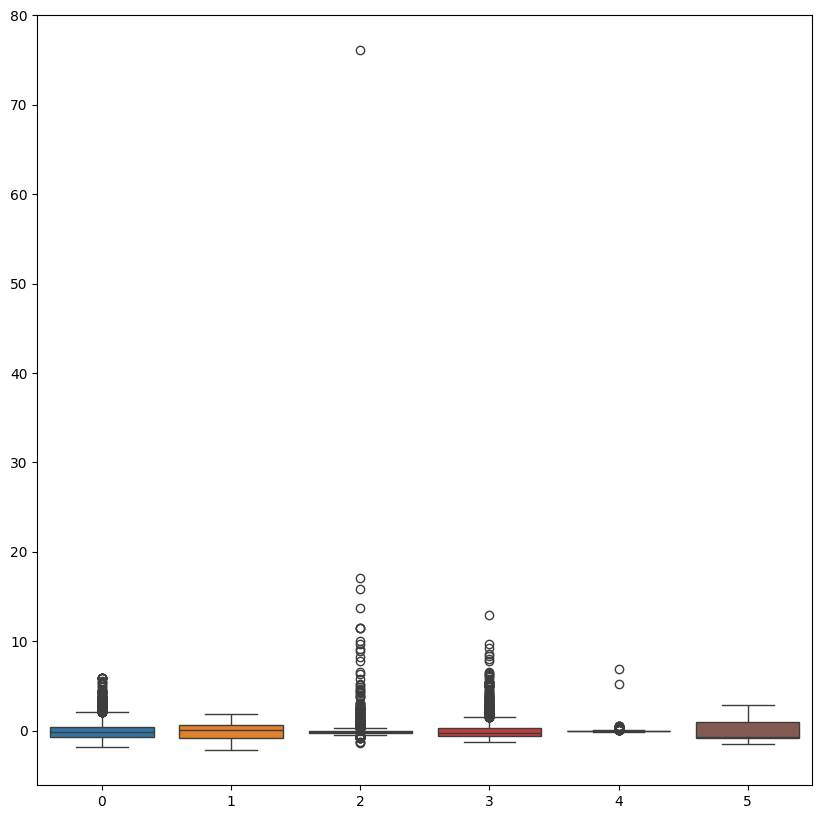

In [31]:
# plot for test set
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_test,ax=ax) # all are in same scale and level

In [32]:
# model training

# remember here we have not removed any redundant columns from correlation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
# let's see the coefficients of the model
print(model.coef_) # values for m1,m2,m3,m4....m8 slopes for each feature

[ 0.82211893  0.23261559  0.03005588  0.02966719 -0.04875288 -0.10247085]


In [34]:
# let's see the intercept c
print(model.intercept_)

2.071946937378876


In [35]:
# model prediction

pred_target=model.predict(x_test)

In [36]:
pred_target

array([1.02638722, 1.55125291, 2.23776681, ..., 4.22980849, 1.67032868,
       1.78336996])

In [37]:
np.size(pred_target)

4128

In [38]:
# find the residuals/ errors

residuals = y_test-pred_target
print(residuals) # index , error

20046   -0.549387
3024    -1.093253
15663    2.762243
20484   -0.539209
9814     0.734287
           ...   
15362    0.375220
16623    1.071863
18086    0.770202
2144    -0.947329
3665    -0.268370
Name: Target_Price, Length: 4128, dtype: float64


Text(9.444444444444445, 0.5, 'Density')

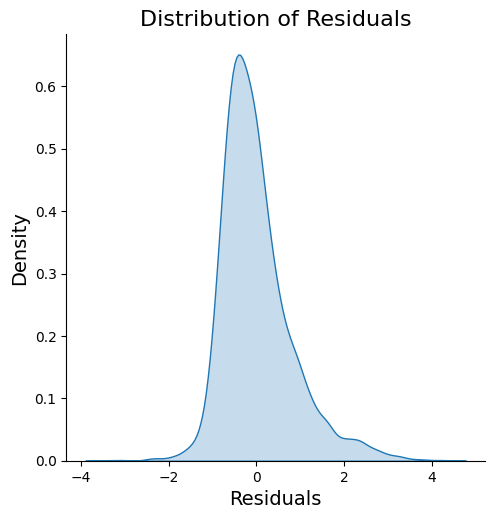

In [39]:
# let's plot the distribution of residuals
 # its normal dist meaning that linear regresion is the correct model
sns.displot(residuals, kind='kde', fill=True)
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [40]:
# model performance
# we look for low MAE, MAE and high R2

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse=mean_squared_error(y_test,pred_target)
mae=mean_absolute_error(y_test,pred_target)
r2=r2_score(y_test,pred_target)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.650987011959808
Mean Absolute Error: 0.5994267148293405
R-squared: 0.5032184434254283


In [41]:
# find adjusted r2

Adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f'Adjusted R-squared: {Adj_r2}')


Adjusted R-squared: 0.5024951506956425


In [42]:
print('RMSE: ',np.sqrt(mse))

RMSE:  0.8068376614659284


In [43]:
# save the model to pickle file

import pickle
pickle.dump(model,open('model.pkl','wb')) # we can download it from the files session in collab


In [44]:
# import the pickle file and to test
# whats there in the pickle file--> the coefficients and intercept
model=pickle.load(open('model.pkl','rb') )
print(model.coef_)
print(model.intercept_)

# the model is ready for testing

[ 0.82211893  0.23261559  0.03005588  0.02966719 -0.04875288 -0.10247085]
2.071946937378876


In [45]:
# let's test it with 1st row
model.predict(x_test[:1])

array([1.02638722])

In [46]:
# Now, let's apply the L1 (lasso) and L2 (ridge) regularization techniques

from sklearn.linear_model import Ridge, Lasso

lasso_model=Lasso(alpha=1.0) # alpha means lambda
lasso_model.fit(x_train,y_train)

ridge_model=Ridge(alpha=1.0) # alpha means lambda
ridge_model.fit(x_train,y_train)

Ridge()

In [49]:
# let's predict by lasso model

pred_target_lasso=lasso_model.predict(x_test)

In [50]:
pred_target_lasso

array([2.07194694, 2.07194694, 2.07194694, ..., 2.07194694, 2.07194694,
       2.07194694])

In [51]:
# let's predict by ridge model

pred_target_ridge=ridge_model.predict(x_test)

In [52]:
pred_target_ridge

array([1.02645817, 1.5512843 , 2.23773347, ..., 4.22966873, 1.67034983,
       1.78339968])

In [54]:
# let's evaluate the performance of  both models

mse_l=mean_squared_error(y_test,pred_target_lasso)
mae_l=mean_absolute_error(y_test,pred_target_lasso)
r2_l=r2_score(y_test,pred_target_lasso)

mse_r=mean_squared_error(y_test,pred_target_ridge)
mae_r=mean_absolute_error(y_test,pred_target_ridge)
r2_r=r2_score(y_test,pred_target_ridge)

print("------Lasso Model------")
print(f'Mean Squared Error: {mse_l}')
print(f'Mean Absolute Error: {mae_l}')
print(f'R-squared: {r2_l}')
print('RMSE: ',np.sqrt(mse_l),'\n')

print("------Ridge Model------")
print(f'Mean Squared Error: {mse_r}')
print(f'Mean Absolute Error: {mae_r}')
print(f'R-squared: {r2_r}')
print('RMSE: ',np.sqrt(mse_r),'\n')

------Lasso Model------
Mean Squared Error: 1.3106960720039365
Mean Absolute Error: 0.9060685490007149
R-squared: -0.00021908714592466794
RMSE:  1.1448563543099792 

------Ridge Model------
Mean Squared Error: 0.6509843585890777
Mean Absolute Error: 0.5994294864433541
R-squared: 0.5032204682671186
RMSE:  0.8068360171615281 



In [ ]:
# we apply lasso and ridge regularizations iff overfitting happens.
# here, in this case, it's may not be happening. so , it's not correct to apply the regularizations here